## HR Analytics - https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#ProblemStatement

In [1]:
# imports
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')

In [3]:
# read the data
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
sub_df = pd.read_csv('./data/sample_submission.csv')

print(f'Train: {train_df.shape}, Test: {test_df.shape}')

Train: (54808, 14), Test: (23490, 13)


In [4]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [5]:
# remove unnecessary columns
unnecessary_cols = ['employee_id']

train_df.drop(unnecessary_cols, inplace=True, axis=1)
test_df.drop(unnecessary_cols, inplace=True, axis=1)

## Data exploration..

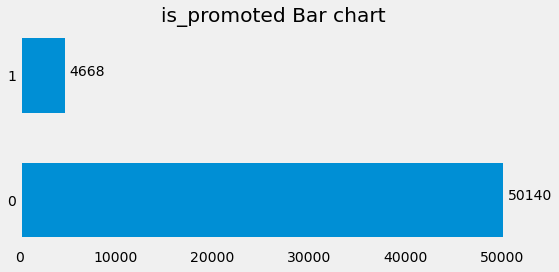

In [6]:
plt.figure(figsize=(8, 4))
x = train_df.is_promoted.value_counts().index
y = train_df.is_promoted.value_counts().values
plt.barh(x, y, height=0.6)
for i, j in zip(x, y):
    plt.text(j+500, i, j, wrap=True)
plt.grid(False)
plt.yticks(x)
plt.title("is_promoted Bar chart")
plt.tight_layout()

> ## Imbalance problem
Clear case of imbalance dataset as expected. Fewer people get promotion of all employees working in a company every year

In [7]:
# separate out the label column
label = train_df.is_promoted
train_df.drop('is_promoted', inplace=True, axis=1)

In [8]:
train_df.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73


In [9]:
train_df.isnull().sum()*100/len(train_df)

department              0.000000
region                  0.000000
education               4.395344
gender                  0.000000
recruitment_channel     0.000000
no_of_trainings         0.000000
age                     0.000000
previous_year_rating    7.524449
length_of_service       0.000000
KPIs_met >80%           0.000000
awards_won?             0.000000
avg_training_score      0.000000
dtype: float64

In [12]:
# fill null values
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()

knn_imputer.fit_transform(train_df)

ValueError: could not convert string to float: 'Sales & Marketing'

In [46]:
train_df.isnull().sum()

department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

## Baseline model

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [43]:
train_df_dum = pd.get_dummies(train_df)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(train_df_dum, label, shuffle=True, stratify=label, random_state=13)
X_train.shape, X_test.shape

((41106, 58), (13702, 58))

In [45]:
baseline_lr = LogisticRegression(random_state=13, class_weight='balanced')
baseline_lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

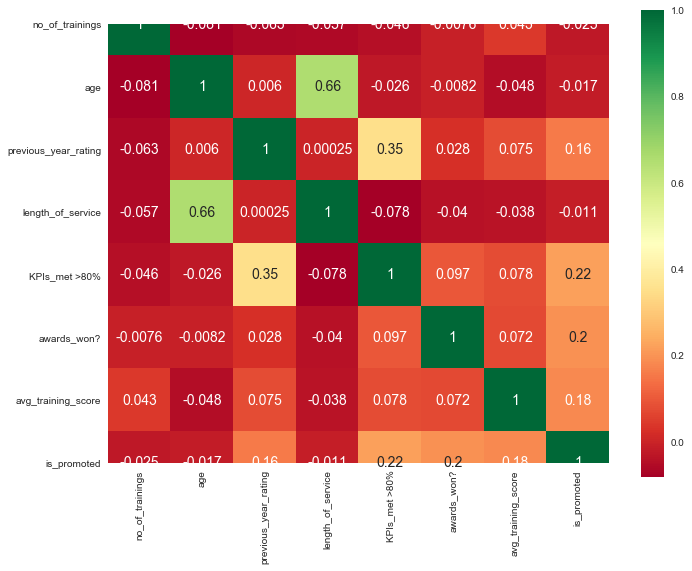

In [7]:
# lets check feature columns
plt.style.use('seaborn')
plt.figure(figsize=(10, 8))
corr_data = train_df.corr()
sns.heatmap(corr_data, annot=True, cmap='RdYlGn', square=True)

In [ ]:
train_df.department.value_counts()

In [ ]:
plt.scatter(train_df.department.values, train_df.is_promoted.values)